# Graded Challenge 4

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

In this kernel, I'll implement K-Means and other algorithm with python and scikit learn for clustering to develop a customer segmentation to define marketing strategy. 

***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import plotly.express as px
from plotly.offline import init_notebook_mode
from time import time
from warnings import filterwarnings
filterwarnings('ignore')

from time import time
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

***Data Loading***

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- some variables in the dataset indicate missing values, it is necessary to handle the missing values ​​in the next step

***Data Cleaning***

In [8]:
dfc = df.copy()

In [9]:
dfc.dropna(inplace=True)

In [10]:
dfc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
dfc.shape

(8636, 18)

In [12]:
dfc.drop(columns='CUST_ID',inplace=True)

In [13]:
dfc.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1123,661.423035,0.636364,1109.53,630.01,479.52,952.743339,0.416667,0.083333,0.416667,0.083333,1,6,7500.0,3137.508664,137.306097,0.0,12


In [14]:
features = dfc.columns

In [15]:
features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [16]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [17]:
credit = dfc.copy()

***Explonatory Data Analysis***

View the distribution of each variable

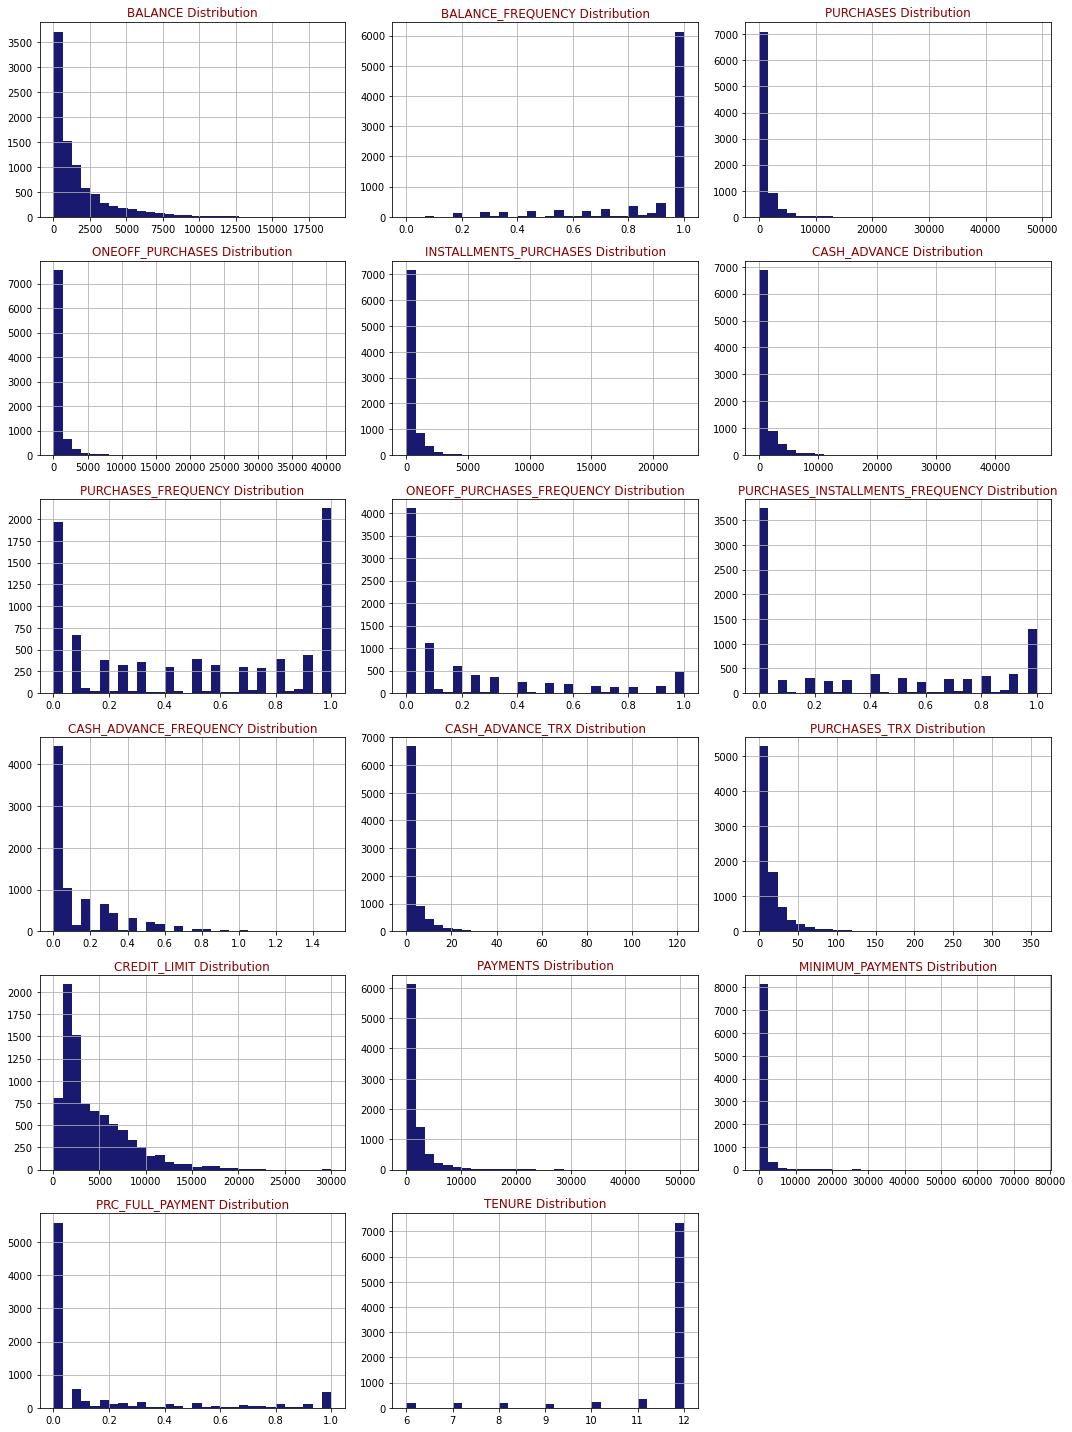

In [18]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=30,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(credit,credit.columns,6,3)

Data is highly skewed and hence taking log transformation

In [19]:
for col in features:
    credit[col] = np.log(1 + credit[col])

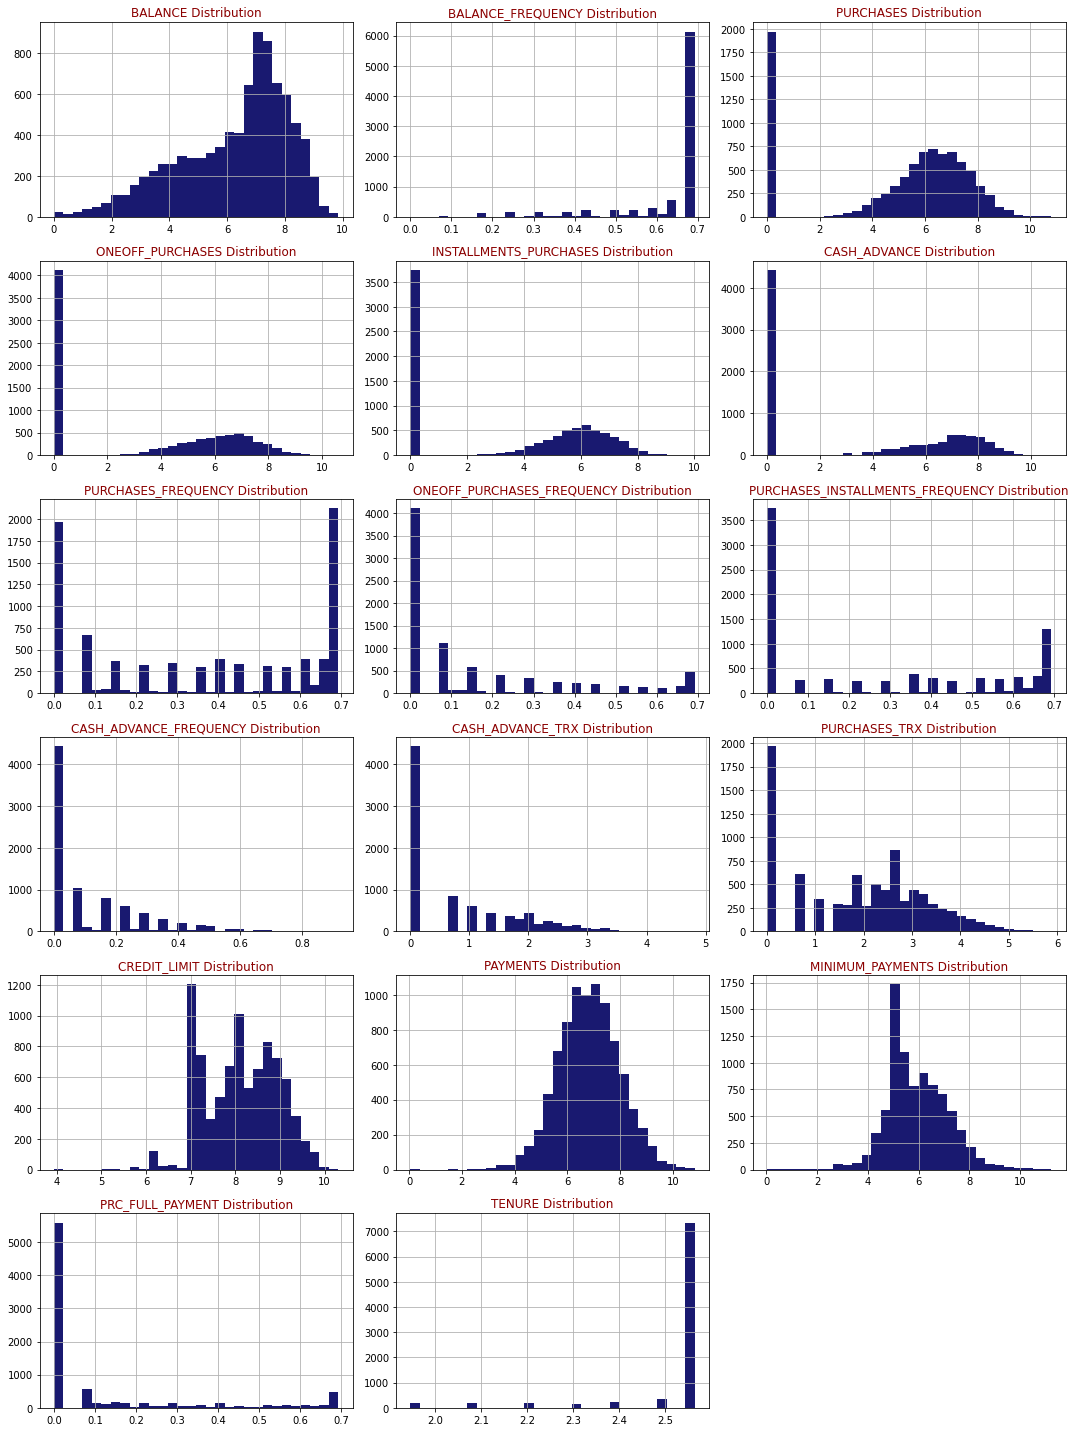

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=30,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(credit,credit.columns,6,3)

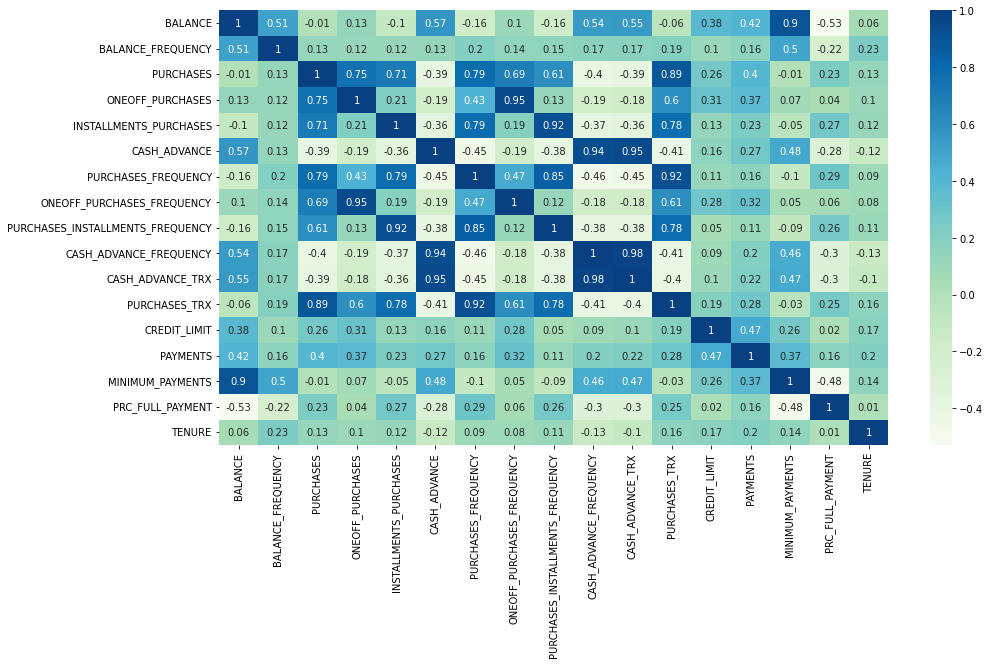

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(credit[features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

In [22]:
corr_mat = credit[features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

ONEOFF_PURCHASES_FREQUENCY  PURCHASES_FREQUENCY                 0.504701
CASH_ADVANCE_TRX            BALANCE                             0.511084
CASH_ADVANCE                BALANCE                             0.533352
ONEOFF_PURCHASES_FREQUENCY  PURCHASES                           0.576428
PURCHASES_TRX               ONEOFF_PURCHASES                    0.579608
BALANCE_FREQUENCY           BALANCE                             0.594837
PURCHASES                   PURCHASES_INSTALLMENTS_FREQUENCY    0.612595
ONEOFF_PURCHASES_FREQUENCY  PURCHASES_TRX                       0.622928
PURCHASES                   ONEOFF_PURCHASES                    0.684594
                            INSTALLMENTS_PURCHASES              0.688923
PURCHASES_TRX               PURCHASES_INSTALLMENTS_FREQUENCY    0.768967
                            INSTALLMENTS_PURCHASES              0.783017
INSTALLMENTS_PURCHASES      PURCHASES_FREQUENCY                 0.805694
ONEOFF_PURCHASES_FREQUENCY  ONEOFF_PURCHASES       

***Data Preprocessing***

- **Analyzing features using VIF**

In [23]:
# Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = [feature for feature in features if feature not in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX',
                                                                                'BALANCE', 'PURCHASES_FREQUENCY', 'PAYMENTS',
                                                                                'PURCHASES', 'CASH_ADVANCE_TRX', 'BALANCE_FREQUENCY',
                                                                                'INSTALLMENTS_PURCHASES']]
vif["VIF"] = [variance_inflation_factor(credit[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

                          variables       VIF
0                  ONEOFF_PURCHASES  6.166274
1                      CASH_ADVANCE  6.234814
2        ONEOFF_PURCHASES_FREQUENCY  4.819006
3  PURCHASES_INSTALLMENTS_FREQUENCY  2.317927
4            CASH_ADVANCE_FREQUENCY  4.619382
5                  PRC_FULL_PAYMENT  1.568836
6                            TENURE  5.855831


- **Looking at Outliers**

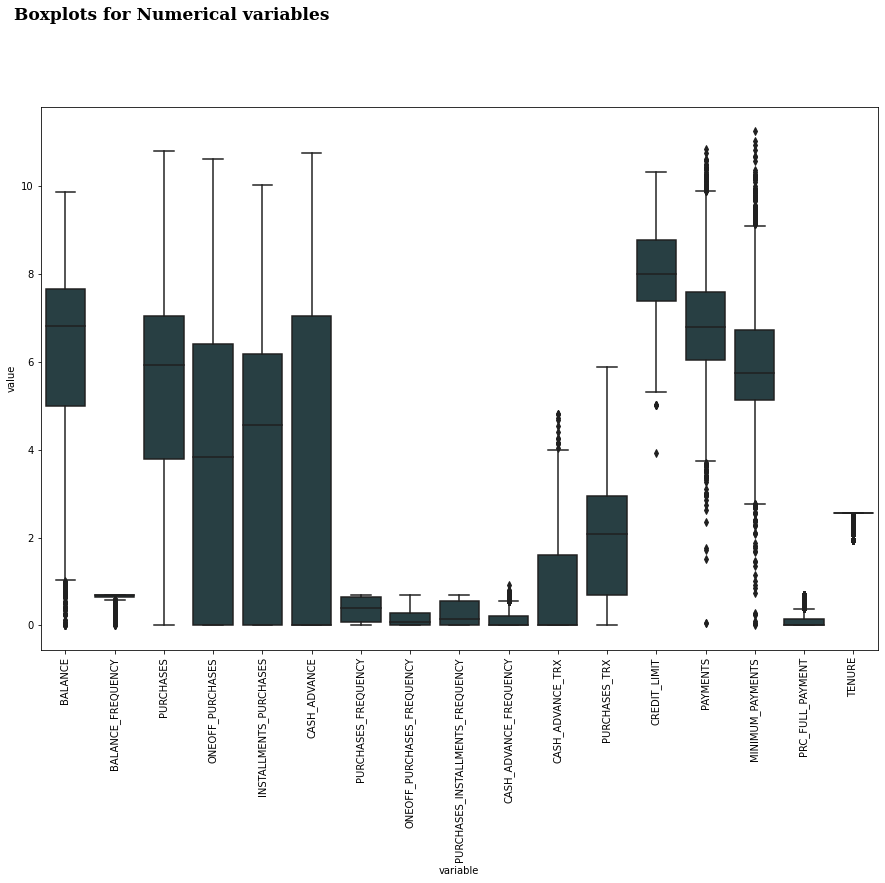

In [24]:
NumericData = credit[[feature for feature in features if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for Numerical variables", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['#244247']*len(features))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [25]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in features:
    tempData = credit.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 0.73,
 'BALANCE_FREQUENCY': 17.74,
 'PURCHASES': 0.0,
 'ONEOFF_PURCHASES': 0.0,
 'INSTALLMENTS_PURCHASES': 0.0,
 'CASH_ADVANCE': 0.0,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 0.0,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 2.27,
 'CASH_ADVANCE_TRX': 0.17,
 'PURCHASES_TRX': 0.0,
 'CREDIT_LIMIT': 0.07,
 'PAYMENTS': 1.12,
 'MINIMUM_PAYMENTS': 1.66,
 'PRC_FULL_PAYMENT': 14.78,
 'TENURE': 14.94}

In [26]:
features.shape

(17,)

In [27]:
credit.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2538,6.280702,0.646627,0.000000,0.000000,0.000000,6.836666,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,7.496097,7.469999,5.336529,0.105360,2.564949
8429,3.391051,0.693147,5.888878,0.000000,5.888878,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,7.601402,5.867470,4.570157,0.559616,2.564949
7540,2.737825,0.492477,3.680091,3.680091,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,6.908755,3.983146,5.097958,0.000000,2.564949
2200,8.034507,0.693147,0.000000,0.000000,0.000000,7.827111,0.000000,0.000000,0.000000,0.405465,2.397895,0.000000,8.294300,6.912409,6.485096,0.000000,2.564949
210,8.637083,0.693147,5.977923,5.041617,5.484382,8.688533,0.650588,0.650588,0.154151,0.559616,3.218876,2.772589,9.210440,7.560409,7.457349,0.000000,2.564949


**Feature Scaling**

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
data_train = credit.copy()

data_train = scaler.fit_transform(data_train)

In [29]:
data_train = pd.DataFrame(data_train, columns=[features])

In [30]:
data_train.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
552,1.484708,0.484556,1.517922,1.816848,1.404707,-0.937894,1.183110,2.440893,1.336945,-0.731226,-0.817000,1.905415,1.922469,2.097192,1.554418,-0.569607,0.341778
2825,-2.267412,-3.684430,0.070810,-0.996024,0.565536,-0.937894,-0.512327,-0.740409,-0.177509,-0.731226,-0.817000,-0.384545,1.350939,-0.187896,-0.889651,1.815180,0.341778
2053,0.312728,0.484556,0.858807,1.199650,0.872332,-0.937894,1.183110,1.604102,1.014627,-0.731226,-0.817000,1.123797,-0.733891,0.718520,-0.164341,-0.195929,0.341778
1765,0.435052,-1.795159,-1.686451,-0.996024,-1.096108,1.288160,-1.317269,-0.740409,-0.968116,-0.127736,0.265283,-1.390107,-0.112941,-0.216705,0.451515,-0.569607,-0.968171
5265,-1.522498,-2.039009,0.183028,-0.996024,0.671648,-0.937894,-0.512327,-0.740409,-0.421953,-0.731226,-0.817000,-0.222686,0.729799,-1.051533,-1.422512,0.556256,0.341778


***PCA***

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_component=7)
data_train_pca = pca.fit_transform(data_train)
pca.explained_variance_ratio_

array([0.3473001 , 0.22415275, 0.09591753, 0.07681046, 0.06848134,
       0.04368109, 0.04194168, 0.03034052, 0.02082976, 0.01478311,
       0.01017272, 0.00809595, 0.00583618, 0.00510397, 0.00271924,
       0.00237101, 0.0014626 ])

***K-Means***

K-Means model with 2 cluster

In [32]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=42) 

kmeans_2.fit(data_train)

KMeans(n_clusters=2, random_state=42)

In [33]:
kmeans_2.cluster_centers_

array([[ 0.51102931,  0.11643791, -1.05712677, -0.54097139, -0.91232441,
         0.97029011, -1.03908323, -0.52289761, -0.86002232,  0.83592488,
         0.89185388, -1.02344647, -0.04422346,  0.02919265,  0.35109604,
        -0.41194053, -0.1299318 ],
       [-0.27396698, -0.06242331,  0.56673428,  0.29001917,  0.48910455,
        -0.52018043,  0.55706098,  0.28032967,  0.46106497, -0.44814614,
        -0.47813013,  0.54867799,  0.02370856, -0.01565042, -0.18822545,
         0.22084468,  0.0696575 ]])

In [34]:
kmeans_2.inertia_

107895.04376138526

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

Use elbow method to find optimal number of clusters

In [35]:
from sklearn.metrics import silhouette_score, rand_score


inertia=[]
silhouetteScore = []
n_clusters = 30
for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_train)
    inertia.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(data_train, kmeans.predict(data_train)))

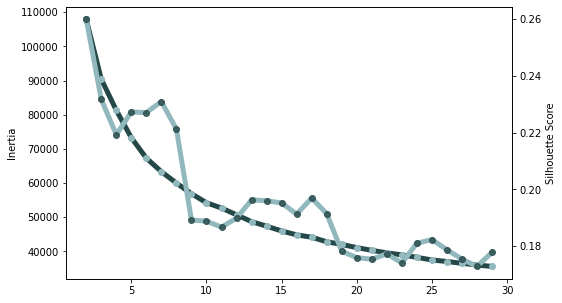

In [36]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(range(2, n_clusters), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2, n_clusters), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2, n_clusters), silhouetteScore, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2, n_clusters), silhouetteScore, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()


- Based on Silhoutte Score and Elbow, we can consider clusters to be 7

Build Model

In [37]:
model= KMeans(n_clusters=7, init='k-means++', random_state=42, algorithm='elkan')
y = model.fit_predict(data_train)

In [38]:
kmeans.cluster_centers_

array([[-3.37609850e-01,  3.57578447e-01,  1.05902666e+00,
         1.28220045e+00,  1.11581806e+00, -8.18055660e-01,
         1.09975241e+00,  1.79990196e+00,  1.00167341e+00,
        -6.79687303e-01, -7.46812084e-01,  1.35421219e+00,
         7.61710370e-01,  1.01095974e+00, -5.84079148e-01,
         2.03208075e+00,  2.65779004e-01],
       [-9.21576561e-01, -2.41390820e+00, -1.56300159e+00,
        -8.97803379e-01, -1.08273170e+00,  9.63404710e-01,
        -1.28670884e+00, -7.10006626e-01, -9.62718265e-01,
         1.06826328e-01,  3.79099934e-01, -1.33833382e+00,
        -3.76905753e-01,  1.44794107e-01, -9.66733395e-01,
         2.45705003e-01, -1.26439841e-04],
       [ 1.26817070e-02,  3.72801399e-01,  7.57149459e-01,
         9.42706338e-01,  9.30616330e-01, -9.08707258e-01,
         9.07884208e-01,  5.89169063e-01,  9.25677842e-01,
        -7.17514735e-01, -7.99225285e-01,  9.12506785e-01,
        -2.60101118e-02,  6.87087960e-02, -2.54934535e-01,
        -2.78158110e-01,  2.4

In [39]:
kmeans.inertia_

35605.79670490735

Visualizing the clusters using PCA

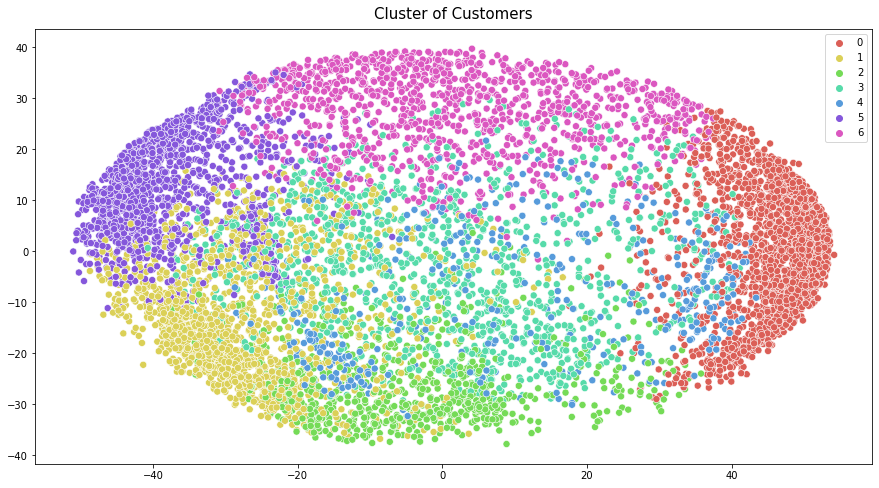

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1-cosine_similarity(data_train)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

***Gaussian Mixture***

Build Model

In [54]:
# Number of clusters is determined using elbow method above

from sklearn.mixture import GaussianMixture

model= GaussianMixture(n_components=7)
y = model.fit_predict(data_train)

Visualizing the clusters using PCA

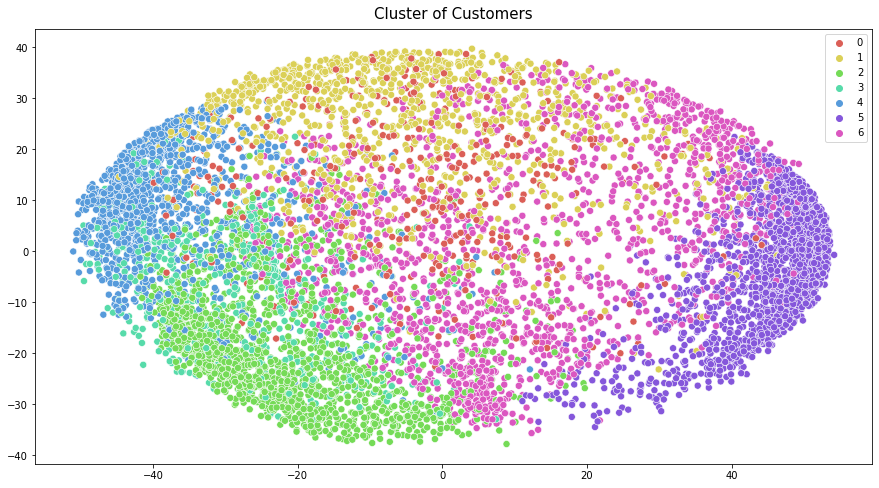

In [55]:
dist = 1-cosine_similarity(data_train)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

**Model Evaluation**

In evaluating the model, I will use the silhouette method. With a vulnerable value from -1 to 1. The higher the value, the better the axes. 1 indicates that the cluster is already tight and 0 indicates overlap between clusters

In [43]:
#K-Means 
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=5).fit(data_train)
    preds = clusterer.predict(data_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_train, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2272830726002762)
For n_clusters = 3, silhouette score is 0.2274432271231734)
For n_clusters = 4, silhouette score is 0.22712567422058888)
For n_clusters = 5, silhouette score is 0.22712567422058888)
For n_clusters = 6, silhouette score is 0.2274432271231734)
For n_clusters = 7, silhouette score is 0.22728894974346672)
For n_clusters = 8, silhouette score is 0.22712567422058888)
For n_clusters = 9, silhouette score is 0.22712567422058888)


In [44]:
#Gaussian Mixture
range_n_components = list (range(2,10))

for n_components in range_n_components:
    guass = GaussianMixture(n_components=6, covariance_type='full', random_state=42).fit(data_train)
    preds = guass.predict(data_train)

    score = silhouette_score(data_train, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_components, score))

For n_clusters = 2, silhouette score is 0.17877206079447933)
For n_clusters = 3, silhouette score is 0.17877206079447933)
For n_clusters = 4, silhouette score is 0.17877206079447933)
For n_clusters = 5, silhouette score is 0.17877206079447933)
For n_clusters = 6, silhouette score is 0.17877206079447933)
For n_clusters = 7, silhouette score is 0.17877206079447933)
For n_clusters = 8, silhouette score is 0.17877206079447933)
For n_clusters = 9, silhouette score is 0.17877206079447933)


Model Interpretation

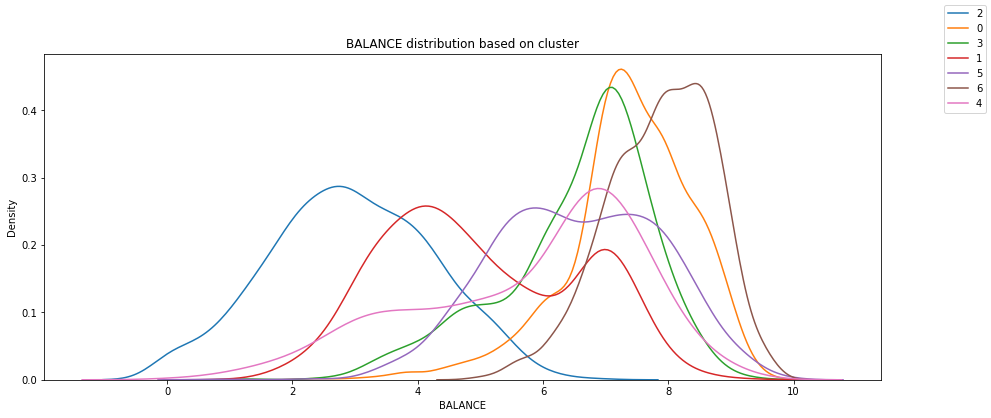

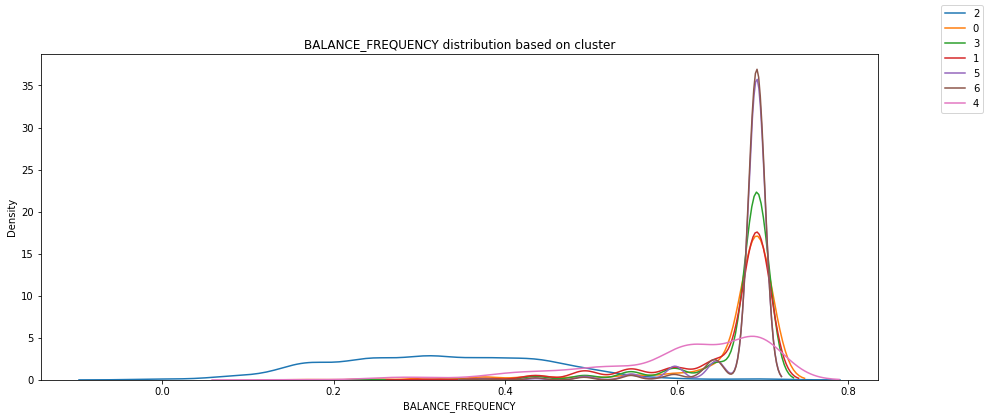

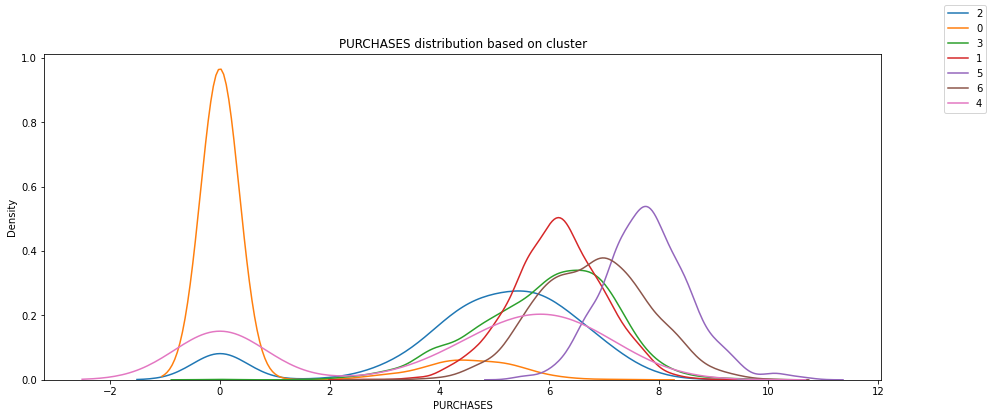

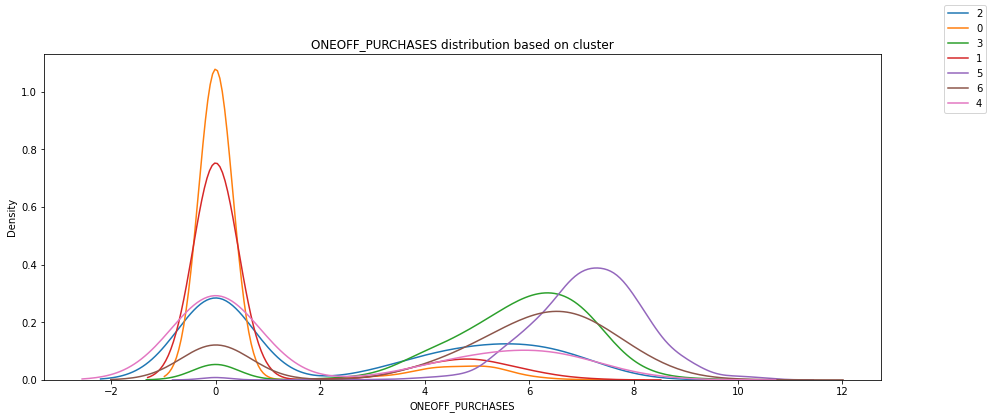

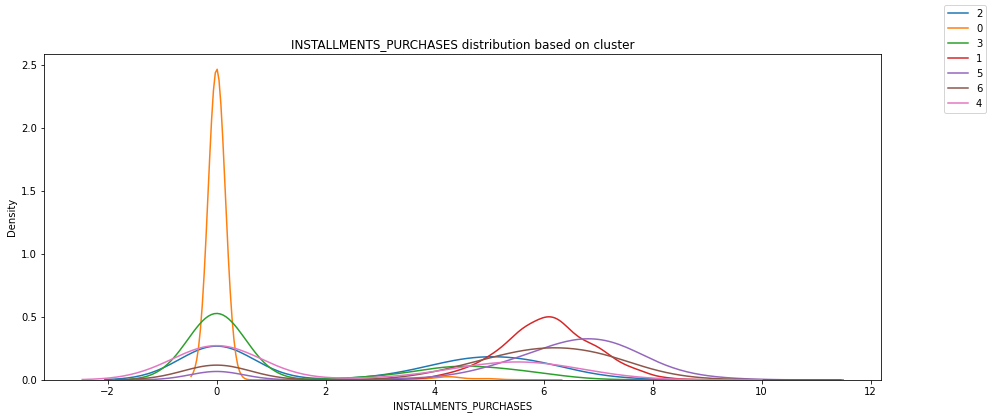

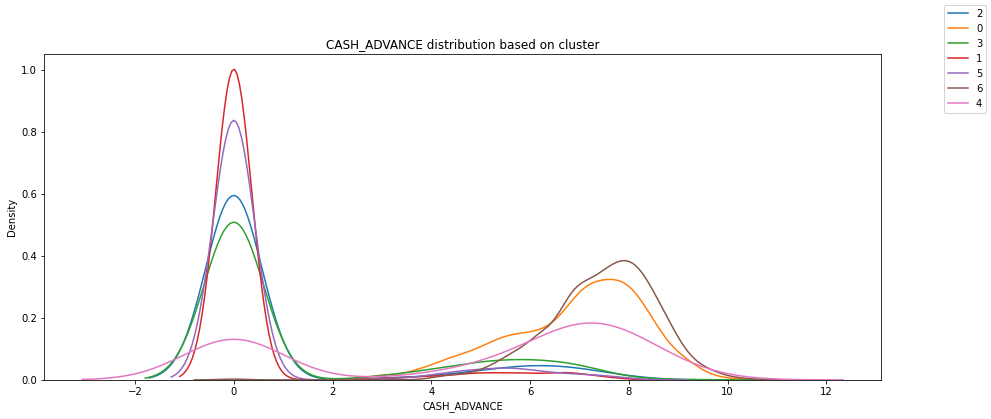

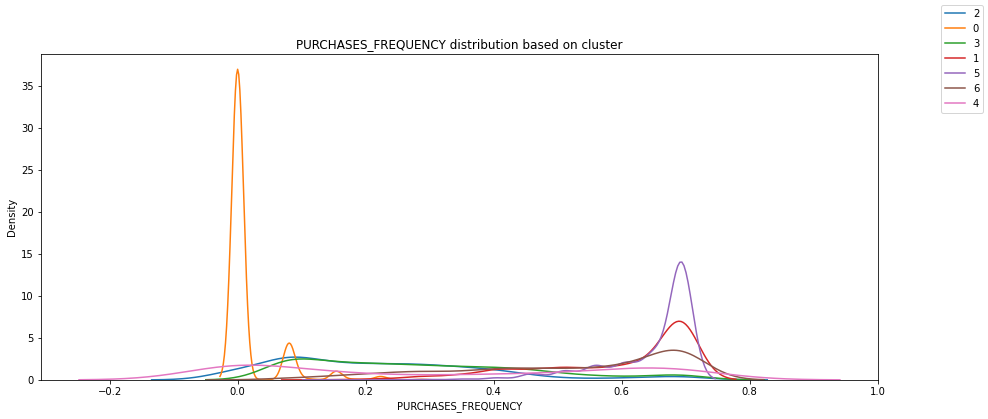

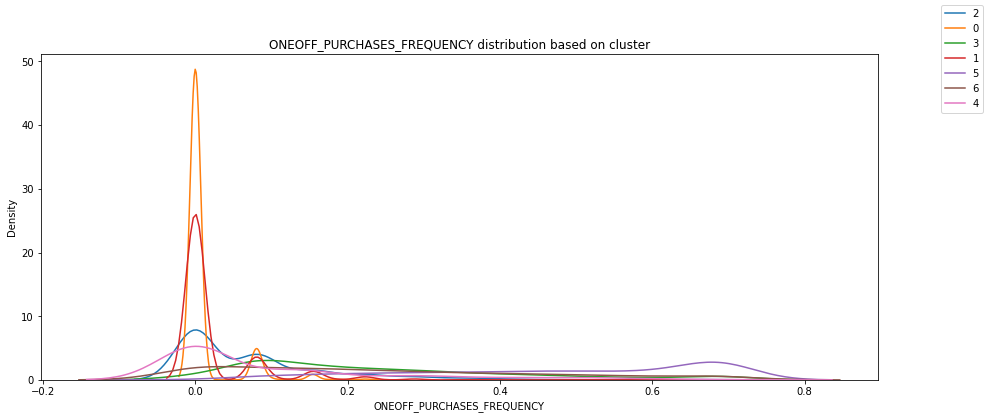

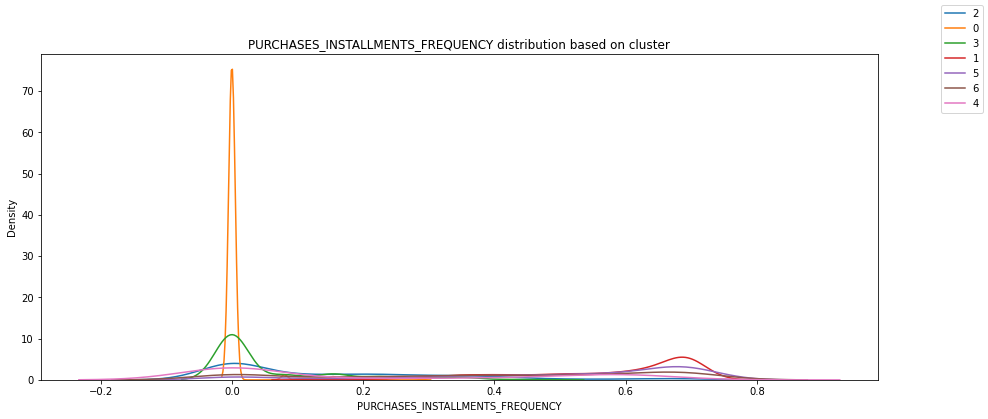

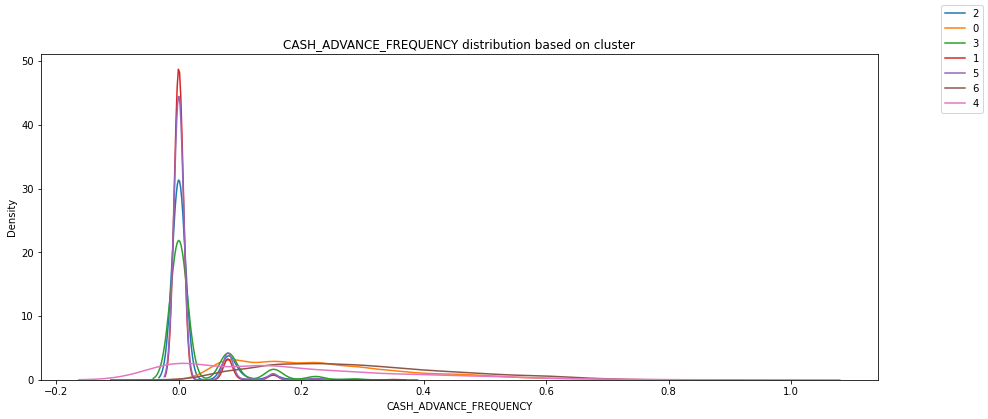

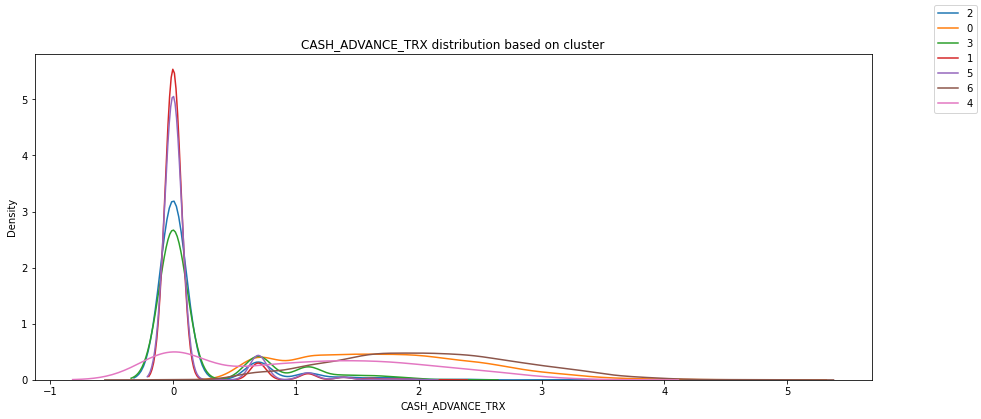

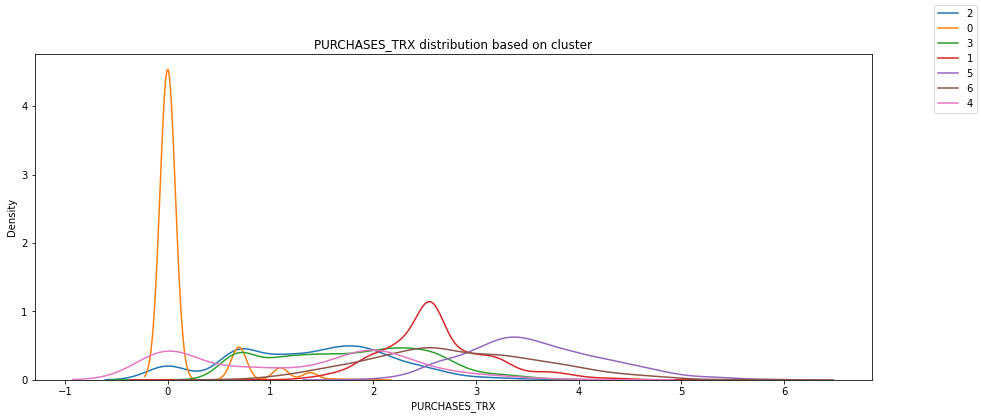

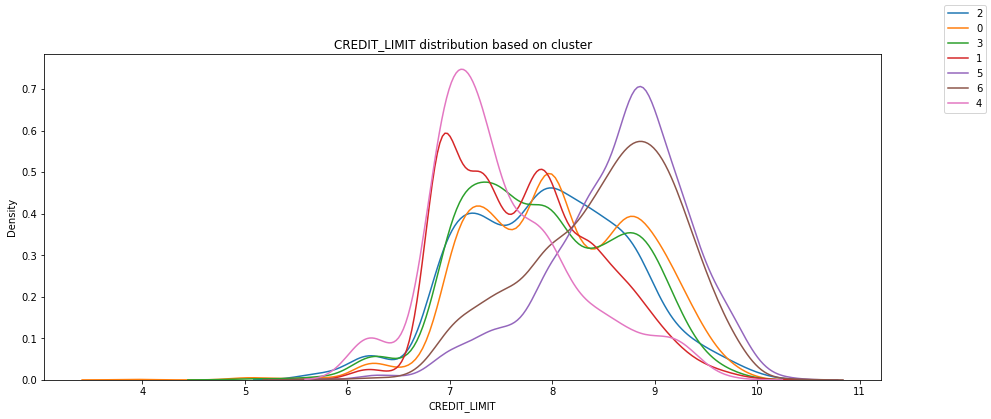

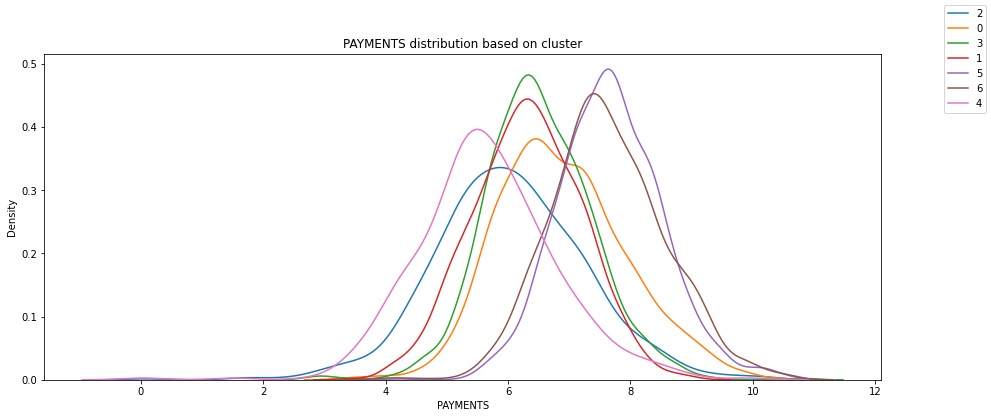

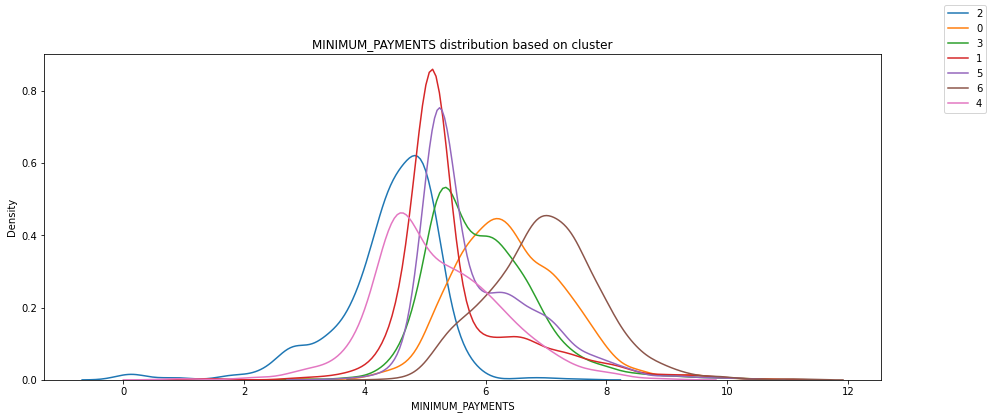

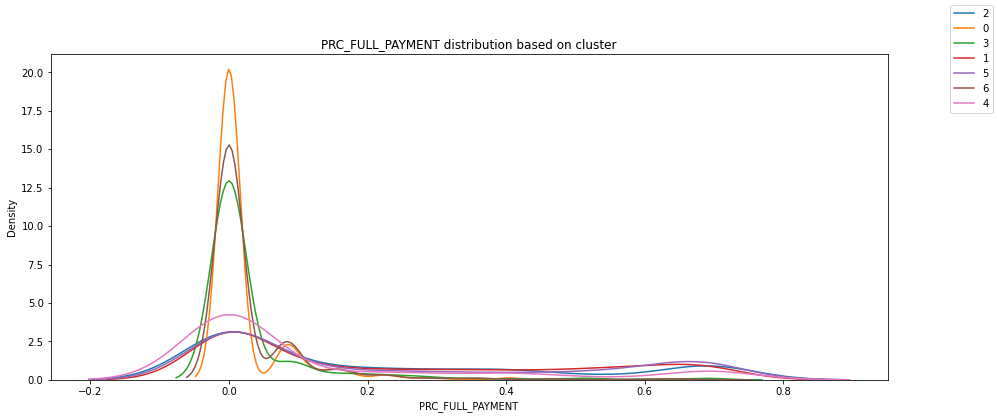

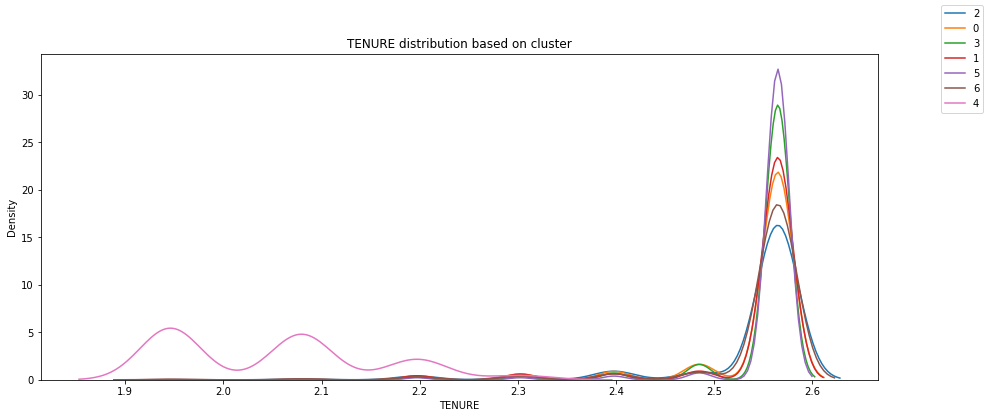

In [45]:
def plot_num_cat(feature, target, figsize=None):
    fig = plt.figure(figsize=(15,6))

    for value in credit[target].unique():
        sns.kdeplot(credit[credit[target]==value][feature])

    fig.legend(labels=credit[target].unique())
    plt.title('{} distribution based on {}'.format(feature, target))
    plt.show()
    
credit['cluster'] = y
for feature in features:
    plot_num_cat(feature, 'cluster')

**Model Inference**

In [46]:
new_data = [{
    'BALANCE': 1762.23,
    'BALANCE_FREQUENCY': 0.9,
    'PURCHASES' : 10362.32,
    'ONEOFF_PURCHASES':5.303305,
    'INSTALLMENTS_PURCHASES' : 0.0,
    'CASH_ADVANCE': 0.0,
    'PURCHASES_FREQUENCY' : 0.90,
    'ONEOFF_PURCHASES_FREQUENCY' : 0.89,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
    'CASH_ADVANCE_FREQUENCY' : 0.0,
    'CASH_ADVANCE_TRX' : 0,
    'PURCHASES_TRX':210,
    'CREDIT_LIMIT':2700,
    'PAYMENTS': 10402.12,
    'MINIMUM_PAYMENTS':2000.10,
    'PRC_FULL_PAYMENT':0.0,
    'TENURE':12
}]

new_data = pd.DataFrame(new_data,index=[1])
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,1762.23,0.9,10362.32,5.303305,0.0,0.0,0.9,0.89,0.0,0.0,0,210,2700,10402.12,2000.1,0.0,12


In [47]:
new_sample = scaler.transform(new_data)
new_sample = pd.DataFrame(new_sample,index=[1],columns = [features])
new_sample

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,926.203947,2.123745,3543.83616,0.634542,-1.096108,-0.937894,1.929288,3.344378,-0.968116,-0.731226,-0.817,150.935392,3273.647668,8962.03636,1675.781166,-0.569607,74.326425


In [51]:
model_KM = KMeans(n_clusters=7, init='k-means++', random_state=42, algorithm='elkan')
y = model_KM.fit_predict(data_train)

In [53]:
model_KM.predict(new_sample)

array([5], dtype=int32)

In [58]:
model_GM= GaussianMixture(n_components=7)
y = model_GM.fit_predict(data_train)

In [59]:
model_GM.predict(new_sample)

array([4])

**Model Analysis**

- Firstly, I use PCA with component = 7, the value is obtained from the EVR which shows the optimal number of components

- Before fitting the model, I normalize the outliers because almost all variables have outliers. This aims to get better results when creating a model for clustering

- For clustering using the Kmeans Algorithm, I started with the number of clusters, namely 2 and showed a fairly high inertia result. So I use the elbow method to determine the optimal number of clusters

- After searching for the optimal number of clusters using the elbow method, the optimal number of clusters Based on Silhoutte Score and Elbow is obtained, which is 7

- The number of clusters is used for the parameters of the 2 models, namely kmeans and gaussian mixture, after fitting the silhouette value is quite good from the kmeans model.

**Overall Analysis**

In general, the data used for customer segmentation has a fairly high outlier on several variables. This will have an impact on the results of the model for clustering, so companies need to provide guidance on whether some of these data should be removed or should remain. I choose to normalize the outliers because I think it's important to do to get good results. The two models made have results that are not much different, it can be seen in the clustering visualization which shows almost the same results. 